## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

## Data generation

The function below will generate the data points and requires these inputs:

centroidLocation: Coordinates of the centroids that will generate the random data.
Example: input: [[4,3], [2,-1], [-1,4]]

numSamples: The number of data points we want generated, split over the number of centroids (# of centroids defined in centroidLocation)
Example: 1500

clusterDeviation: The standard deviation between the clusters. The larger the number, the further the spacing.
Example: 0.5

In [2]:
def createDataPoints (centroidLocation, numSamples, clusterDeviation):
        # create random data and store in feature matrix X and response vector y
        X, y = make_blobs (n_samples = numSamples, centers = centroidLocation, cluster_std = clusterDeviation)
        # Standardize features by removing the mean and scaling to unit variance
        X = StandardScaler ().fit_transform (X)
        return X,y

In [3]:
X, y = createDataPoints ([[4,3], [2,-1], [-1,4]], 1500, 0.5)

In [4]:
X.shape

(1500, 2)

In [5]:
y.shape

(1500,)

In [6]:
X

array([[ 0.33660633, -1.17291934],
       [ 0.13094539, -1.43076677],
       [ 0.69671668,  0.32019864],
       ...,
       [ 0.05414891, -1.6353822 ],
       [-1.33380332,  0.72844516],
       [ 1.39803671,  0.36356194]])

In [7]:
y

array([1, 1, 0, ..., 1, 2, 0])

In [8]:
y

array([1, 1, 0, ..., 1, 2, 0])

## Modeling 

It works based on two parameters: Epsilon and Minimum Points

Epsilon determine a specified radius that if includes enough number of points within, we call it dense area

minimumSamples determine the minimum number of data points we want in a neighborhood to define a cluster.

In [9]:
epsilon = 0.3
minimumSamples = 7

db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
print (set (labels))
labels

{0, 1, 2}


array([0, 0, 1, ..., 0, 2, 1])

## Distinguish outliers

Lets Replace all elements with 'True' in core_samples_mask that are in the cluster, 'False' if the points are outliers.

In [10]:
# Create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

In [11]:
core_samples_mask

array([False, False, False, ..., False, False, False])

In [12]:
db.core_sample_indices_.size

1496

In [13]:
core_samples_mask[db.core_sample_indices_] = True

In [14]:
core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [15]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [16]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{0, 1, 2}

## Data visualization

In [17]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

In [18]:
colors

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.99807766, 0.99923106, 0.74602076, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])

In [19]:
colors.shape

(3, 4)

In [20]:
zip (unique_labels, colors)

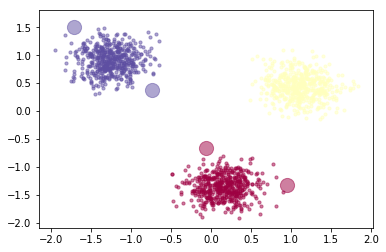

In [21]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=10, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=200, c=[col], marker=u'o', alpha=0.5)

In [22]:
class_member_mask = labels 

In [23]:
set (class_member_mask)

{0, 1, 2}

In [24]:
set (~class_member_mask)

{-3, -2, -1}

In [25]:
(labels == 2)

array([False, False, False, ..., False,  True, False])

## Weather Station Clustering using DBSCAN & scikit-learn

In [26]:
!wget -O weather-stations20140101-20141231.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/weather-stations20140101-20141231.csv

--2020-04-07 08:55:46--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/weather-stations20140101-20141231.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129821 (127K) [text/csv]
Saving to: ‘weather-stations20140101-20141231.csv’

100%[======================================>] 129,821      425KB/s   in 0.3s   

2020-04-07 08:55:47 (425 KB/s) - ‘weather-stations20140101-20141231.csv’ saved [129821/129821]



In [27]:
import pandas as pd

## Load the dataset

In [28]:
filename = 'weather-stations20140101-20141231.csv'

In [29]:
df = pd.read_csv (filename)

In [30]:
df.head ()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


In [31]:
df.shape

(1341, 25)

## Cleaning

In [32]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 25 columns):
Stn_Name    1341 non-null object
Lat         1341 non-null float64
Long        1341 non-null float64
Prov        1341 non-null object
Tm          1256 non-null float64
DwTm        1256 non-null float64
D           357 non-null float64
Tx          1260 non-null float64
DwTx        1260 non-null float64
Tn          1260 non-null float64
DwTn        1260 non-null float64
S           586 non-null float64
DwS         586 non-null float64
S%N         198 non-null float64
P           1227 non-null float64
DwP         1227 non-null float64
P%N         209 non-null float64
S_G         798 non-null float64
Pd          1227 non-null float64
BS          0 non-null float64
DwBS        0 non-null float64
BS%         0 non-null float64
HDD         1256 non-null float64
CDD         1256 non-null float64
Stn_No      1341 non-null object
dtypes: float64(22), object(3)
memory usage: 262.0+ KB


In [33]:
df = df [df.Tm.notnull ()]

In [34]:
df.shape

(1256, 25)

In [35]:
df = df.reset_index (drop = True)

In [36]:
df.head ()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,...,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710


## Visualization

In [37]:
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline

In [39]:
!conda install -c conda-forge proj4
!conda install basemap

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - proj4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    proj4-6.1.1                |       hc80f0dc_1         9.8 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        12.3 MB

The following NEW packages will be INSTALLED:

    proj4:           6.1.1-hc80f0dc_1  conda-forge
    python_abi:      3.6-1_cp36m       conda-forge

The following packages will be UPDATED:

    ca-

In [42]:
!CONDA_PREFIX/share/proj

/usr/bin/sh: CONDA_PREFIX/share/proj: No such file or directory


In [48]:
import os

!conda_file_dir = conda.__file__
!conda_dir = conda_file_dir.split('lib')[0]
!proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
!os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

/usr/bin/sh: conda_file_dir: command not found
/usr/bin/sh: -c: line 0: syntax error near unexpected token `('
/usr/bin/sh: -c: line 0: `conda_dir = conda_file_dir.split('lib')[0]'
/usr/bin/sh: -c: line 0: syntax error near unexpected token `('
/usr/bin/sh: -c: line 0: `proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')'
/usr/bin/sh: os.environ[PROJ_LIB]: command not found


FileNotFoundError: [Errno 2] No such file or directory: '/home/YOUR_USER/anaconda3/share/proj/epsg'